# **Bivariate: Cat/Num: Stats**

---



## **t-test**

In [39]:
# Don't forget to mount Google Drive if you haven't already:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('bikebuyers_original.csv')
df

,ID,Marital Status,Gender,Income,Children,Cars,Age,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,40000,0,1,42,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,70000,0,1,38,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,70000,0,1,43,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,60000,4,3,42,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,60000,3,2,66,Bachelors,Management,No,1-2 Miles,North America,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14798,Single,Female,10000,4,2,41,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
996,16259,Single,Female,10000,4,2,40,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
997,16410,Single,Female,10000,4,2,41,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
998,28957,Single,Female,120000,0,4,34,Partial High School,Professional,Yes,10+ Miles,Pacific,Yes


In [40]:
import pandas as pd
from scipy import stats

purchased_yes_male = df[(df['Purchased Bike'] == 'Yes') & (df['Gender'] == 'Male')]['Income']
purchased_yes_female = df[(df['Purchased Bike'] == 'Yes') & (df['Gender'] == 'Female')]['Income']

t_stat, p_value = stats.ttest_ind(purchased_yes_male, purchased_yes_female, equal_var=False)

print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 1.3063563652508063, P-value: 0.19205863693062383


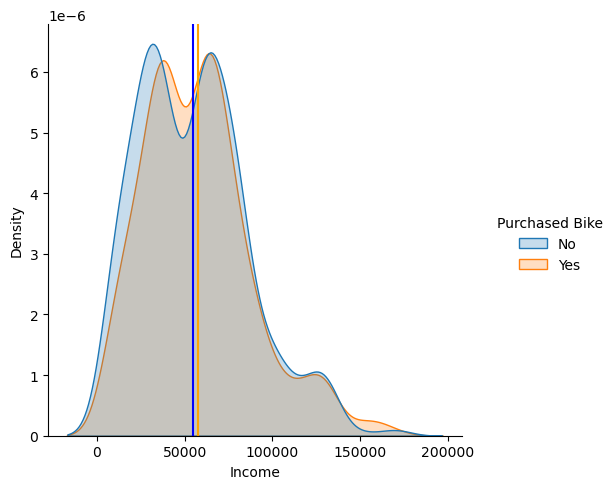

Did purchase bike	$57505.2
Did not purchase bike	$54874.76


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df, x="Income", hue="Purchased Bike", kind='kde', fill=True)
plt.axvline(x=purchased_yes.mean(), color='orange')
plt.axvline(x=purchased_no.mean(), color='blue')
plt.show()

print(f'Did purchase bike\t${round(purchased_yes.mean(), 2)}')
print(f'Did not purchase bike\t${round(purchased_no.mean(), 2)}')

In [42]:
from scipy import stats

stats.ttest_ind(purchased_yes, purchased_no)

TtestResult(statistic=1.3376803853026817, pvalue=0.18130539397879913, df=998.0)

In [43]:
t, p = stats.ttest_ind(purchased_yes, purchased_no)

print(f't-test:\t{t}')
print(f'p-value:{p}')

t-test:	1.3376803853026817
p-value:0.18130539397879913


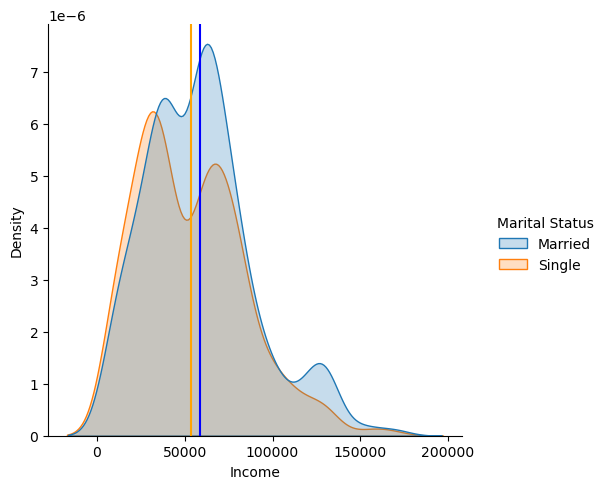

t-test:	2.5388846033694885
p-value:0.011271571956825746


In [44]:
df = pd.read_csv('bikebuyers_original.csv',usecols=['Purchased Bike', 'Income', 'Education', 'Marital Status'])

married = df[df['Marital Status'] == 'Married']['Income']
single = df[df['Marital Status'] == 'Single']['Income']

sns.displot(df, x="Income", hue="Marital Status", kind='kde', fill=True)
plt.axvline(x=married.mean(), color='blue')
plt.axvline(x=single.mean(), color='orange')
plt.show()

t, p = stats.ttest_ind(married, single)

print(f't-test:\t{t}')
print(f'p-value:{p}')

It appears that married customers have statistically significantly higher incomes than single customers because the p-value is below 0.05, the t-test is a positive number, and the married list was inputted into the ttest_ind function first (indicating that single incomes were subtracted from married incomes

## **one-way ANOVA**

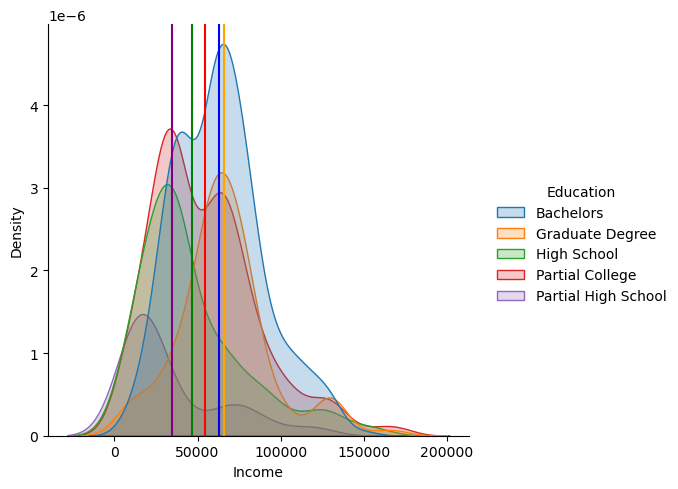

In [45]:
# Don't forget to mount Google Drive if you haven't already:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('bikebuyers_original.csv',usecols=['Purchased Bike', 'Income', 'Education'])

bachelors = df[df['Education'] == 'Bachelors']['Income']
graduate = df[df['Education'] == 'Graduate Degree']['Income']
highschool = df[df['Education'] == 'High School']['Income']
partialcollege = df[df['Education'] == 'Partial College']['Income']
partialhighschool = df[df['Education'] == 'Partial High School']['Income']

sns.displot(df, x="Income", hue="Education", kind='kde', fill=True)
plt.axvline(x=bachelors.mean(), color='blue')
plt.axvline(x=graduate.mean(), color='orange')
plt.axvline(x=highschool.mean(), color='green')
plt.axvline(x=partialcollege.mean(), color='red')
plt.axvline(x=partialhighschool.mean(), color='purple')
plt.show()

In [46]:
from scipy import stats

f, p = stats.f_oneway(bachelors, graduate, highschool, partialcollege, partialhighschool)

print(f'F-stat: {f}')
print(f'p-value:{p}')

F-stat: 23.472223177586464
p-value:1.4457374425180454e-18


## **Generating Group Lists for ANOVA**

In [47]:
# Don't forget to mount Google Drive if you haven't already:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
from scipy import stats

df = pd.read_csv('bikebuyers_original.csv', usecols=['Income', 'Education'])

groups = df['Education'].unique() # discover each unique group value
groups

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [48]:
grouped_values = [] # create an empty list of keep track of the label sub-lists

for group in groups: # ['Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School']
  # append a sub-list of incomes into the overall list
  grouped_values.append(df[df['Education'] == group]['Income'])

grouped_values # print out the list to examine it

[0      40000
 1      70000
 2      70000
 3      60000
 4      60000
        ...  
 301    70000
 302    40000
 303    40000
 304    70000
 305    60000
 Name: Income, Length: 306, dtype: int64,
 306     60000
 307     60000
 308     60000
 309     70000
 310    100000
         ...  
 475     60000
 476     60000
 477     70000
 478     70000
 479     60000
 Name: Income, Length: 174, dtype: int64,
 480     20000
 481     30000
 482     60000
 483     20000
 484     40000
         ...  
 654     20000
 655     10000
 656    120000
 657     70000
 658     70000
 Name: Income, Length: 179, dtype: int64,
 659     60000
 660     40000
 661     30000
 662    130000
 663     60000
         ...  
 919     80000
 920     70000
 921     40000
 922    120000
 923     60000
 Name: Income, Length: 265, dtype: int64,
 924     30000
 925     10000
 926     10000
 927     20000
 928     70000
         ...  
 995     10000
 996     10000
 997     10000
 998    120000
 999     20000
 Name: Income, Len

In [49]:
# use the '*' symbol to dynamically input each sub-list into f_oneway separated by commas
f, p = stats.f_oneway(*grouped_values)

print(f'F: {f}')
print(f'p: {p}')

F: 23.472223177586464
p: 1.4457374425180454e-18


In [50]:
def anova(df, feature, label):
  groups = df[feature].unique() # discover each unique group value
  grouped_values = []           # create an overall list of keep track of the label sub-lists
  for group in groups:          # for each unique group value
    grouped_values.append(df[df[feature]==group][label])  # append a sub-list of label values into the overall list
  return stats.f_oneway(*grouped_values)                  # use the '*' symbol to dynamically input each sub-list into the f_oneway_function separated by commans

# Bring in any data set that we have used in prior examples:
df = pd.read_csv('insurance.csv')
f, p = anova(df, 'smoker', 'charges')
print(f'F: {f}')
print(f'p: {p}')

F: 2177.614868056519
p: 8.271435842182967e-283


# **Practice Problems**

---




## Practice 1: NFL Plays
You have been hired as a consultant to analyze NFL plays in order to eventually predict how many yards will be earned by each play.
* Import the dataset above into a DataFrame and print the first five records to examine the data. Use pd.set_option('display.max_columns', None) after you import pands in order to view all columns
* Print the unique values of Formation
* Drop all records except those with the formation of 'UNDER CENTER', 'SHOTGUN', 'NO HUDDLE', or 'NO HUDDLE SHOTGUN'
  * Search Google for 'filter dataframe if value in list' for examples on how to do this
* Calculate the mean Salary for each of the remaining Formation types and add them to a KDE chart to view the differences by status
* Using a t-test, determine whether there is a significant difference in Yards between SHOTGUN and UNDER CENTER
* Using an ANOVA, determine whether there is a significant difference among all four Formation types

In [51]:
# Don't forget to mount Google Drive if you haven't already:
# from google.colab import drive
# drive.mount('/content/drive')

# Import the dataset above into a DataFrame and print the first five records to examine the data

import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/nfl_plays_2022.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/data/nfl_plays_2022.csv'

In [ ]:
# Print the unique values of Employee Status

df['Formation'].unique()

array(['UNDER CENTER', 'FIELD GOAL', 'SHOTGUN', 'NO HUDDLE',
       'NO HUDDLE SHOTGUN', 'PUNT', '0'], dtype=object)

In [ ]:
# Drop all records except those with the formation of 'UNDER CENTER', 'SHOTGUN', 'NO HUDDLE', or 'NO HUDDLE SHOTGUN'

df = df[df['Formation'].isin(['UNDER CENTER', 'SHOTGUN', 'NO HUDDLE', 'NO HUDDLE SHOTGUN'])]

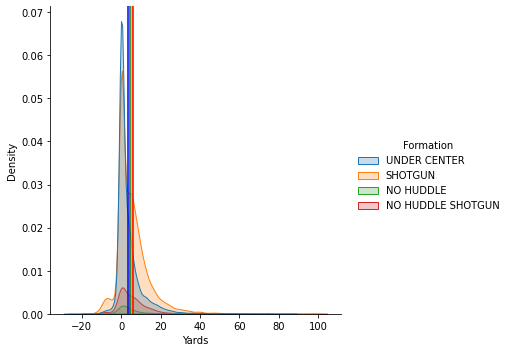

In [ ]:
# Calculate the mean Yards for each type of Formation and add it as a line on a KDE
# chart to view the differences by Formation (as demonstrated in the chapter)

import seaborn as sns
from matplotlib import pyplot as plt

under_center = df[df['Formation'] == 'UNDER CENTER']['Yards']
shotgun = df[df['Formation'] == 'SHOTGUN']['Yards']
no_huddle = df[df['Formation'] == 'NO HUDDLE']['Yards']
no_huddle_shotgun = df[df['Formation'] == 'NO HUDDLE SHOTGUN']['Yards']

sns.displot(df, x="Yards", hue="Formation", kind='kde', fill=True)
plt.axvline(x=under_center.mean(), color='blue')
plt.axvline(x=shotgun.mean(), color='orange')
plt.axvline(x=no_huddle.mean(), color='green')
plt.axvline(x=no_huddle_shotgun.mean(), color='red')
plt.show()

In [ ]:
# Print the mean Yards of UNDER CENTER vs SHOTGUN. Using a t-test, determine
# whether there is a significant difference in Yards between them.

print(f'UNDER CENTER: {under_center.mean()}')
print(f'SHOTGUN: {shotgun.mean()}')

t, p = stats.ttest_ind(shotgun, under_center)
print(f't: {t}')
print(f'p: {p}')
print('Plays based on a shotgun formation earn significantly more yards than under center')

UNDER CENTER: 3.586750788643533
SHOTGUN: 5.637343960616539
t: 21.087410307971187
p: 5.5181218226527176e-98
Plays based on a shotgun formation earn significantly more yards than under center


In [ ]:
# Using an ANOVA, determine whether there is a significant difference
# among all four formation types

F, p = stats.f_oneway(under_center, shotgun, no_huddle, no_huddle_shotgun)

print(f'F:{F}')
print(f'p:{p}')
print('There is a very significant affect of Formation on Yards')

F:163.28299973772144
p:4.637069096709806e-105
There is a very significant affect of Formation on Yards


## Practice 2: ANOVA Function
If you didn't already complete this practice at the end of the prior section, create a function that will take any DataFrame and the names of a categorical and numeric feature and calculate an ANOVA for those features and print the results. Test this function using the nfl_plays_2022.csv dataset to determine whether there is a difference in Yards by Month.

In [ ]:
def anova(df, feature, label):
  groups = df[feature].unique() # discover each unique group value
  grouped_values = []           # create an overall list of keep track of the label sub-lists
  for group in groups:          # for each unique group value
    grouped_values.append(df[df[feature]==group][label])  # append a sub-list of label values into the overall list
  return stats.f_oneway(*grouped_values)                  # use the '*' symbol to dynamically input each sub-list into the f_oneway_function separated by commans

# Bring in any data set that we have used in prior examples:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/nfl_plays_2022.csv')
f, p = anova(df, 'Month', 'Yards')
print(f'F: {f}')
print(f'p: {p}')
print('P-value is greather than 0.05. There is no difference in yards by month.')

F: 0.5537426277536242
p: 0.6455913311497448
P-value is greather than 0.05. There is no difference in yards by month.


## Practice 3: Testing your Function
Call this function to test the following relationships using datasets you have likely already downloaded from prior chapters:

* insurance.csv
  * region by charges
  * smoker by charges
  * sex by charges
* bikebuyers.csv
  * Region by Income
  * Occupation by Income
  * Commute Distance by Income
* listings.csv (use df.dropna(subset=['average_review']) to drop records that are missing an average review)
  * neighbourhood by average_review
  * room_type by average_review

In [ ]:
print('\t\t\tF\t\tp')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/insurance.csv')
f, p = anova(df, 'region', 'charges')
print(f'Region by Charges \t{round(f, 3)}\t\t{round(p, 3)}')
f, p = anova(df, 'smoker', 'charges')
print(f'Smoker by Charges \t{round(f, 3)}\t{round(p, 3)}')
f, p = anova(df, 'sex', 'charges')
print(f'Sex by Charges \t\t{round(f, 3)}\t\t{round(p, 3)}')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bikebuyers.csv')
f, p = anova(df, 'Region', 'Income')
print(f'Region by Income \t{round(f, 3)}\t\t{round(p, 3)}')
f, p = anova(df, 'Occupation', 'Income')
print(f'Occupation by Income \t{round(f, 3)}\t\t{round(p, 3)}')
f, p = anova(df, 'Commute Distance', 'Income')
print(f'Comm. Dist. by Income \t{round(f, 3)}\t\t{round(p, 3)}')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/listings.csv').dropna(subset=['average_review'])
f, p = anova(df, 'neighbourhood', 'average_review')
print(f'Neighborhood by Reviews {round(f, 3)}\t\t{round(p, 3)}')
f, p = anova(df, 'room_type', 'average_review')
print(f'Room Type by Reviews\t{round(f, 3)}\t{round(p, 3)}')

			F		p
Region by Charges 	2.97		0.031
Smoker by Charges 	2177.615	0.0
Sex by Charges 		4.4		0.036
Region by Income 	62.866		0.0
Occupation by Income 	369.389		0.0
Comm. Dist. by Income 	18.046		0.0
Neighborhood by Reviews 23.248		0.0
Room Type by Reviews	1304.869	0.0


## Practice 4: Automate Further
As you can see from the practice problem above, using functions can save you time and code. But we can automate this even further. Modify your function to accept ONLY a DataFrame and a label name. Then, modify the logic to perform an ANOVA (and print the results) for every categorical feature in the dataset with the specified label

In [ ]:
def anova(df, label):
  print('\t\t\tF\t\tp')

  for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):  # Check to make sure the column in not numeric
      groups = df[col].unique()
      grouped_values = []
      for group in groups:
        grouped_values.append(df[df[col] == group][label])
      f, p = stats.f_oneway(*grouped_values)
      print(f'{col}\t by {label}\t{round(f, 3)}\t{round(p, 3)}')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/insurance.csv')
anova(df, 'charges')

			F		p
sex	 by charges	4.4	0.036
smoker	 by charges	2177.615	0.0
region	 by charges	2.97	0.031
